# Exploratory Data Analysis
## I. Most Common Words
### Analysis
1. Most common words - find these and create word clouds
2. Size of vocabulary - look number of unique words and also how quickly someone speaks
3. Amount of profanity - most common terms

In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Amanda Seales,Bert Kreischer,Marc Maron,Pete Davidson,Stewart Lee
aaaah,0,0,0,0,1
aaahhh,0,0,0,0,1
aaaw,0,0,0,0,1
aah,0,0,0,0,1
aall,0,0,0,1,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Amanda Seales': [('like', 69),
  ('know', 48),
  ('okay', 37),
  ('white', 33),
  ('dont', 32),
  ('aint', 31),
  ('black', 30),
  ('im', 29),
  ('just', 29),
  ('cause', 26),
  ('got', 25),
  ('people', 24),
  ('oh', 21),
  ('shit', 19),
  ('say', 16),
  ('yall', 16),
  ('thats', 15),
  ('really', 15),
  ('women', 14),
  ('delete', 14),
  ('youre', 14),
  ('right', 12),
  ('gon', 11),
  ('harriet', 11),
  ('man', 11),
  ('time', 11),
  ('think', 11),
  ('yeah', 11),
  ('theres', 10),
  ('happen', 10)],
 'Bert Kreischer': [('like', 227),
  ('im', 115),
  ('goes', 84),
  ('know', 46),
  ('just', 46),
  ('got', 42),
  ('dad', 39),
  ('dont', 39),
  ('right', 38),
  ('yeah', 37),
  ('hes', 37),
  ('youre', 34),
  ('shes', 32),
  ('thats', 31),
  ('gonna', 26),
  ('ila', 26),
  ('want', 26),
  ('did', 26),
  ('gun', 24),
  ('wife', 23),
  ('think', 23),
  ('day', 23),
  ('oh', 22),
  ('hey', 22),
  ('ill', 22),
  ('fucking', 21),
  ('georgia', 20),
  ('shit', 20),
  ('fuck', 19),
  ('the

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Amanda Seales
like, know, okay, white, dont, aint, black, im, just, cause, got, people, oh, shit
---
Bert Kreischer
like, im, goes, know, just, got, dad, dont, right, yeah, hes, youre, shes, thats
---
Marc Maron
know, like, dont, just, im, think, youre, right, yeah, jesus, thats, man, gonna, people
---
Pete Davidson
like, know, uh, just, right, im, yeah, dont, cause, youre, um, guy, thats, fuckin
---
Stewart Lee
know, right, like, people, im, dont, laughter, going, thats, got, said, mate, theres, just
---


At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'know',
 'okay',
 'white',
 'dont',
 'aint',
 'black',
 'im',
 'just',
 'cause',
 'got',
 'people',
 'oh',
 'shit',
 'say',
 'yall',
 'thats',
 'really',
 'women',
 'delete',
 'youre',
 'right',
 'gon',
 'harriet',
 'man',
 'time',
 'think',
 'yeah',
 'theres',
 'happen',
 'like',
 'im',
 'goes',
 'know',
 'just',
 'got',
 'dad',
 'dont',
 'right',
 'yeah',
 'hes',
 'youre',
 'shes',
 'thats',
 'gonna',
 'ila',
 'want',
 'did',
 'gun',
 'wife',
 'think',
 'day',
 'oh',
 'hey',
 'ill',
 'fucking',
 'georgia',
 'shit',
 'fuck',
 'theyre',
 'know',
 'like',
 'dont',
 'just',
 'im',
 'think',
 'youre',
 'right',
 'yeah',
 'jesus',
 'thats',
 'man',
 'gonna',
 'people',
 'theyre',
 'day',
 'fuck',
 'got',
 'maybe',
 'guy',
 'good',
 'fucking',
 'mean',
 'lot',
 'hes',
 'did',
 'oh',
 'really',
 'want',
 'look',
 'like',
 'know',
 'uh',
 'just',
 'right',
 'im',
 'yeah',
 'dont',
 'cause',
 'youre',
 'um',
 'guy',
 'thats',
 'fuckin',
 'fuck',
 'got',
 'didnt',
 'did',
 'dad',
 'ti

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 5),
 ('know', 5),
 ('dont', 5),
 ('im', 5),
 ('just', 5),
 ('got', 5),
 ('thats', 5),
 ('youre', 5),
 ('right', 5),
 ('think', 5),
 ('yeah', 5),
 ('oh', 4),
 ('hes', 4),
 ('did', 4),
 ('people', 3),
 ('shit', 3),
 ('really', 3),
 ('time', 3),
 ('theres', 3),
 ('fucking', 3),
 ('fuck', 3),
 ('okay', 2),
 ('cause', 2),
 ('man', 2),
 ('dad', 2),
 ('gonna', 2),
 ('want', 2),
 ('day', 2),
 ('theyre', 2),
 ('guy', 2),
 ('didnt', 2),
 ('thing', 2),
 ('said', 2),
 ('white', 1),
 ('aint', 1),
 ('black', 1),
 ('say', 1),
 ('yall', 1),
 ('women', 1),
 ('delete', 1),
 ('gon', 1),
 ('harriet', 1),
 ('happen', 1),
 ('goes', 1),
 ('shes', 1),
 ('ila', 1),
 ('gun', 1),
 ('wife', 1),
 ('hey', 1),
 ('ill', 1),
 ('georgia', 1),
 ('jesus', 1),
 ('maybe', 1),
 ('good', 1),
 ('mean', 1),
 ('lot', 1),
 ('look', 1),
 ('uh', 1),
 ('um', 1),
 ('fuckin', 1),
 ('sorry', 1),
 ('laughter', 1),
 ('going', 1),
 ('mate', 1),
 ('ive', 1),
 ('joke', 1),
 ('sort', 1),
 ('isnt', 1),
 ('ok', 1),
 ('southend', 1),

In [13]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['like',
 'know',
 'dont',
 'im',
 'just',
 'got',
 'thats',
 'youre',
 'right',
 'think',
 'yeah']

In [14]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [15]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

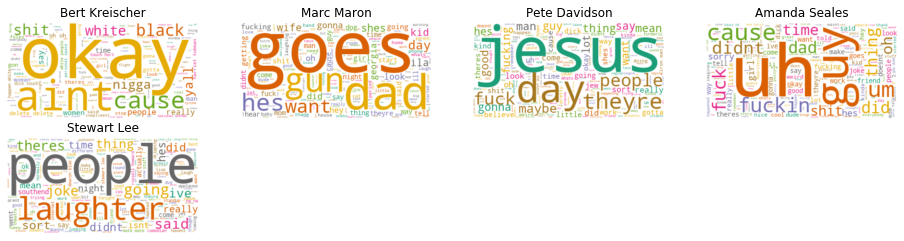

In [16]:
#  Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
comedians = ['Bert Kreischer', 'Marc Maron','Pete Davidson','Amanda Seales', 'Stewart Lee']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedians[index])
    
plt.show()

## II. Number of Words
### Analysis

In [18]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(comedians, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,comedian,unique_words
0,Bert Kreischer,995
3,Amanda Seales,1041
1,Marc Maron,1266
2,Pete Davidson,1375
4,Stewart Lee,2175


In [21]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times in minutes
run_times = [60, 59, 80, 60, 70]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
0,Bert Kreischer,995,2288,60,38.133333
2,Pete Davidson,1375,5046,80,63.075000
3,Amanda Seales,1041,4052,60,67.533333
1,Marc Maron,1266,4184,59,70.915254
4,Stewart Lee,2175,7039,70,100.557143


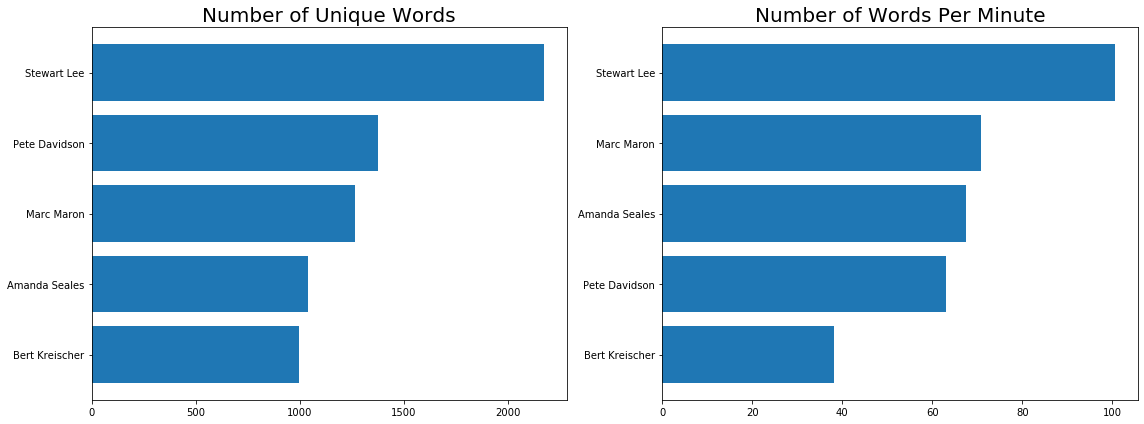

In [22]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## III. Amount of Profanity
### Analysis

In [23]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 5),
 ('know', 5),
 ('dont', 5),
 ('im', 5),
 ('just', 5),
 ('got', 5),
 ('thats', 5),
 ('youre', 5),
 ('right', 5),
 ('think', 5),
 ('yeah', 5),
 ('oh', 4),
 ('hes', 4),
 ('did', 4),
 ('people', 3),
 ('shit', 3),
 ('really', 3),
 ('time', 3),
 ('theres', 3),
 ('fucking', 3),
 ('fuck', 3),
 ('okay', 2),
 ('cause', 2),
 ('man', 2),
 ('dad', 2),
 ('gonna', 2),
 ('want', 2),
 ('day', 2),
 ('theyre', 2),
 ('guy', 2),
 ('didnt', 2),
 ('thing', 2),
 ('said', 2),
 ('white', 1),
 ('aint', 1),
 ('black', 1),
 ('say', 1),
 ('yall', 1),
 ('women', 1),
 ('delete', 1),
 ('gon', 1),
 ('harriet', 1),
 ('happen', 1),
 ('goes', 1),
 ('shes', 1),
 ('ila', 1),
 ('gun', 1),
 ('wife', 1),
 ('hey', 1),
 ('ill', 1),
 ('georgia', 1),
 ('jesus', 1),
 ('maybe', 1),
 ('good', 1),
 ('mean', 1),
 ('lot', 1),
 ('look', 1),
 ('uh', 1),
 ('um', 1),
 ('fuckin', 1),
 ('sorry', 1),
 ('laughter', 1),
 ('going', 1),
 ('mate', 1),
 ('ive', 1),
 ('joke', 1),
 ('sort', 1),
 ('isnt', 1),
 ('ok', 1),
 ('southend', 1),

In [24]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
Amanda Seales,6,19
Bert Kreischer,40,20
Marc Maron,68,18
Pete Davidson,47,19
Stewart Lee,16,8


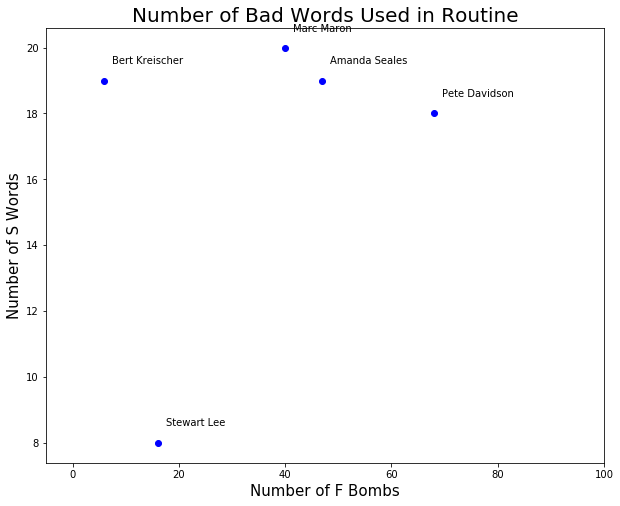

In [29]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, comedians[i], fontsize=10)
    plt.xlim(-5, 100) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()